In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

### 訓練誤差グラフの描画

In [2]:
def load_json(json_path):
    f = open(json_path, "r")
    loaded_json = json.load(f)
    return loaded_json

In [3]:
def get_xy_val(loaded_json) :
    x_list = []
    y_list = []
    for one_epoch_result in loaded_json:
        x_list.append(one_epoch_result["epoch"])
        y_list.append(one_epoch_result["train loss"])
    return x_list, y_list

In [4]:
def func_c2(x, a, b, c):
    return a*x**2 + b*x + c

def func_c3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x +d

In [5]:
def get_approx_y(func, x_list, y_list, d=2):
    approx_y_list = []
    res = optimize.curve_fit(func, x_list, y_list)
    if d == 2:
        for x in x_list:
            approx_y_list.append(func(x, res[0][0], res[0][1], res[0][2]))
    elif d == 3:
        for x in x_list:
            approx_y_list.append(func(x, res[0][0], res[0][1], res[0][2], res[0][3]))
    return approx_y_list

In [6]:
def display_graph(x_list, y_list):
    plt.figure(figsize=(8,6))
    plt.plot(x_list, y_list)

In [14]:
def display_graph_stylish(x_list, y_list):
    plt.figure(figsize=(8,6))
    plt.plot(x_list, y_list, color="black", linewidth=2)

In [48]:
def get_slope(p, q):
    x1 = p[0]
    y1 = p[1]
    x2 = q[0]
    y2 = q[1]
    return (y2-y1)/(x2-x1)

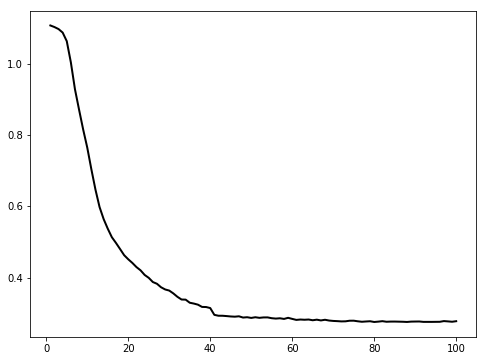

In [15]:
json_path = "../prototype/pytorch_prototype/result/v5/log.json"
loaded_json = load_json(json_path)
x_list, y_list = get_xy_val(loaded_json)
display_graph_stylish(x_list, y_list)

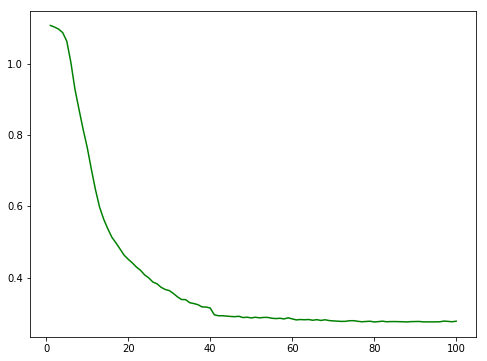

In [6]:
json_path = "../prototype/pytorch_prototype/result/v5/log.json"
loaded_json = load_json(json_path)
x_list, y_list = get_xy_val(loaded_json)
display_graph_with_color(x_list, y_list)

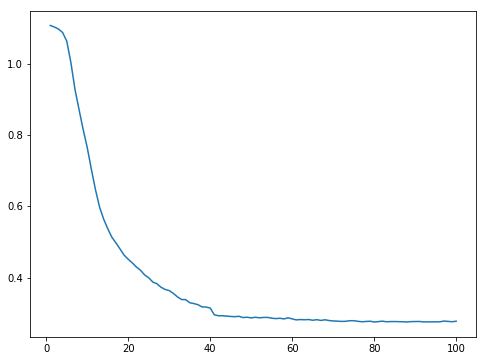

In [46]:
# v5 グラフ描画
json_path = "../prototype/pytorch_prototype/result/v5/log.json"
loaded_json = load_json(json_path)
x_list, y_list = get_xy_val(loaded_json)
display_graph(x_list, y_list)

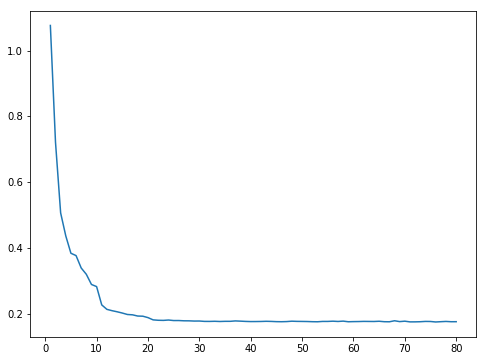

In [47]:
# v6 グラフ描画
json_path = "../prototype/pytorch_prototype/result/v6/log.json"
loaded_json = load_json(json_path)
x_list, y_list = get_xy_val(loaded_json)
display_graph(x_list, y_list)

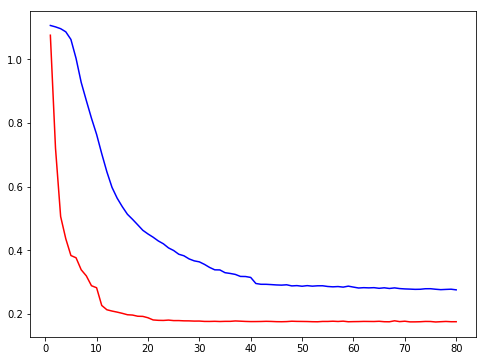

In [8]:
# v5 v6グラフ描画
json_path = "../prototype/pytorch_prototype/result/v5/log.json"
loaded_json = load_json(json_path)
x_list1, y_list1 = get_xy_val(loaded_json)
json_path = "../prototype/pytorch_prototype/result/v6/log.json"
loaded_json = load_json(json_path)
x_list2, y_list2 = get_xy_val(loaded_json)

plt.figure(figsize=(8,6))
plt.plot(x_list1[:80], y_list1[:80], color="blue")
plt.plot(x_list2, y_list2, color="red")

In [96]:
def expected_err(x):
    return 0.8**x + 0.25

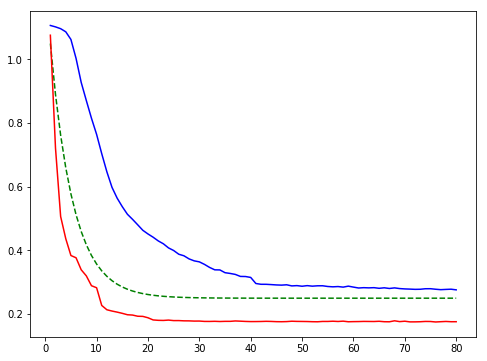

In [98]:
# v5 v6 期待値誤差関数 グラフ描画
json_path = "../prototype/pytorch_prototype/result/v5/log.json"
loaded_json = load_json(json_path)
blue_x, blue_y = get_xy_val(loaded_json)

green_x = blue_x
green_y = []
for x in green_x:
    green_y.append(expected_err(x))

json_path = "../prototype/pytorch_prototype/result/v6/log.json"
loaded_json = load_json(json_path)
red_x, red_y = get_xy_val(loaded_json)

epoch = 80
plt.figure(figsize=(8,6))
plt.plot(blue_x[:epoch], blue_y[:epoch], color="blue")
plt.plot(green_x[:epoch], green_y[:epoch], color="green", linestyle="dashed")
plt.plot(red_x[:epoch], red_y[:epoch], color="red")

### 訓練誤差傾きの算出におけるテスト

In [60]:
# 収束度は値が小さい方が収束していると定義
print("blue -------------------------------------")
p = (x_list1[29], y_list1[29])
q = (x_list1[49], y_list1[49])
end_slope = get_slope(p, q)
print("終盤の傾き: {}".format(end_slope))
p = (x_list1[0], y_list1[0])
q = (x_list1[49], y_list1[49])
overall_slope = get_slope(p, q)
print("全体の傾き: {}".format(overall_slope))
train_err_conv = end_slope / overall_slope
print("訓練誤差収束度: {}".format(train_err_conv))

print("red -------------------------------------")
p = (x_list2[29], y_list2[29])
q = (x_list2[49], y_list2[49])
end_slope = get_slope(p, q)
print("終盤の傾き: {}".format(end_slope))
p = (x_list2[0], y_list2[0])
q = (x_list2[49], y_list2[49])
overall_slope = get_slope(p, q)
print("全体の傾き: {}".format(overall_slope))
train_err_conv = end_slope / overall_slope
print("訓練誤差収束度: {}".format(train_err_conv))

blue -------------------------------------
終盤の傾き: 20.000146637295575
全体の傾き: 49.00684844010401
訓練誤差収束度: 0.40810921889294066
red -------------------------------------
終盤の傾き: 20.000000039580744
全体の傾き: 49.008250891319705
訓練誤差収束度: 0.4080945488940746


In [54]:
def get_both_slope(start, end, x_list, y_list):
    x_list1 = x_list[0]
    x_list2 = x_list[1]
    y_list1 = y_list[0]
    y_list2 = y_list[1]
    p = (x_list1[start], y_list1[start])
    q = (x_list1[end], y_list1[end])
    blue_slope = get_slope(p, q)
    p = (x_list2[start], y_list2[start])
    q = (x_list2[end], y_list2[end])
    red_slope = get_slope(p, q)
    return blue_slope, red_slope

In [56]:
x_list = [x_list1, x_list2]
y_list = [y_list1, y_list2]
scale = 100
blue_slope, red_slope = get_both_slope(0, 9, x_list, y_list)
print("blue slope: {}".format(blue_slope*scale))
print("red slope: {}".format(red_slope*scale))

blue slope: -3.80175555759006
red slope: -8.815242501718028


In [57]:
x_list = [x_list1, x_list2]
y_list = [y_list1, y_list2]
scale = 100
blue_slope, red_slope = get_both_slope(10,19, x_list, y_list)
print("blue slope: {}".format(blue_slope*scale))
print("red slope: {}".format(red_slope*scale))

blue slope: -2.802337033307111
red slope: -0.42931843722308133


In [14]:
p = (x_list1[0], y_list1[0])
q = (x_list1[9], y_list1[9])
blue_slope = get_slope(p, q)
print(blue_slope)
p = (x_list2[0], y_list2[0])
q = (x_list2[9], y_list2[9])
red_slope = get_slope(p, q)
print(red_slope)

9.006501656974772
9.034901153468653


In [49]:
p = (x_list1[0], y_list1[0])
q = (x_list1[9], y_list1[9])
blue_slope = get_slope(p, q)
print(blue_slope)
p = (x_list2[0], y_list2[0])
q = (x_list2[9], y_list2[9])
red_slope = get_slope(p, q)
print(red_slope)

-0.0380175555759006
-0.08815242501718028


### 訓練誤差収束速度の算出

In [100]:
# 訓練誤差収束速度
def get_err_conv_speed(epoch, err, a=10):
    err_conv_speed = 0
    for k in range(1, (epoch//10)+1):
        err_conv_speed += -a/k*(err[10*k - 1] - err[(10*k) - 10])
    return err_conv_speed

In [130]:
# a = 5
a=5
epoch = 80
blue_err = blue_y[:epoch]
green_err = green_y[:epoch]
red_err = red_y[:epoch]
blue_s = get_err_conv_speed(epoch, blue_err, a)
green_s = get_err_conv_speed(epoch, green_err, a)
red_s = get_err_conv_speed(epoch, red_err, a)
bar1 = [blue_s, green_s, red_s]
print("blue 訓練誤差収束速度 {}".format(blue_s))
print("green 訓練誤差収束速度 {}".format(green_s))
print("red  訓練誤差収束速度 {}".format(red_s))

blue 訓練誤差収束速度 2.537659218522291
green 訓練誤差収束速度 3.6635363881297915
red  訓練誤差収束速度 4.068744744513528


In [131]:
# a = 10
a=10
epoch = 80
blue_err = blue_y[:epoch]
green_err = green_y[:epoch]
red_err = red_y[:epoch]
blue_s = get_err_conv_speed(epoch, blue_err, a)
green_s = get_err_conv_speed(epoch, green_err, a)
red_s = get_err_conv_speed(epoch, red_err, a)
bar2 = [blue_s, green_s, red_s]
print("blue 訓練誤差収束速度 {}".format(blue_s))
print("green 訓練誤差収束速度 {}".format(green_s))
print("red  訓練誤差収束速度 {}".format(red_s))

blue 訓練誤差収束速度 5.075318437044582
green 訓練誤差収束速度 7.327072776259583
red  訓練誤差収束速度 8.137489489027056


In [132]:
# a = 50
a=50
epoch = 80
blue_err = blue_y[:epoch]
green_err = green_y[:epoch]
red_err = red_y[:epoch]
blue_s = get_err_conv_speed(epoch, blue_err, a)
green_s = get_err_conv_speed(epoch, green_err, a)
red_s = get_err_conv_speed(epoch, red_err, a)
bar3 = [blue_s, green_s, red_s]
print("blue 訓練誤差収束速度 {}".format(blue_s))
print("green 訓練誤差収束速度 {}".format(green_s))
print("red  訓練誤差収束速度 {}".format(red_s))

blue 訓練誤差収束速度 25.376592185222915
green 訓練誤差収束速度 36.635363881297906
red  訓練誤差収束速度 40.68744744513526


([<matplotlib.axis.XTick at 0x7fbb68a199b0>,
 <a list of 3 Text xticklabel objects>)

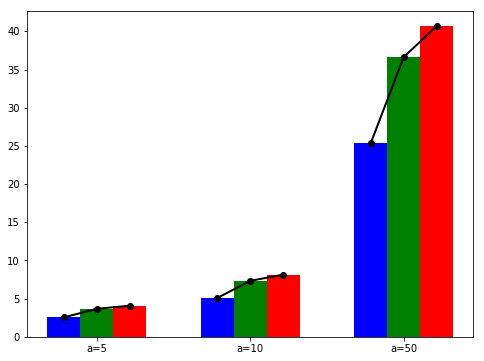

In [143]:
x1 = [1, 2.4, 3.8]
x2 = [1.3, 2.7, 4.1]
x3 = [1.6, 3.0, 4.4]

bar_x = []
for x, y, z in zip(x1, x2, x3):
    bar_x.append([x, y, z])

bar_y = []
for x, y, z in zip(bar1, bar2, bar3):
    bar_y.append([x, y, z])

label_x = ['a=5', 'a=10', 'a=50']

plt.figure(figsize=(8,6))
plt.bar(x1, bar_y[0], color='blue', width=0.3, align="center")
plt.bar(x2, bar_y[1], color='green', width=0.3, align="center")
plt.bar(x3, bar_y[2], color='red', width=0.3, align="center")
plt.plot(bar_x[0], bar1, color='black', linewidth=2, marker="o")
plt.plot(bar_x[1], bar2, color='black', linewidth=2, marker="o")
plt.plot(bar_x[2], bar3, color='black', linewidth=2, marker="o")
plt.xticks([1.3, 2.7, 4.1], label_x)